In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [7]:
df = pd.read_excel('iris-2.xls')

In [8]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
print(df.isnull().sum())

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


In [14]:
data = df.fillna(df.mean())
data.head()

/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_17606/3184384332.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.fillna(df.mean())


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [15]:
print(data.isnull().sum())

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


In [16]:
data.value_counts("Classification")

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

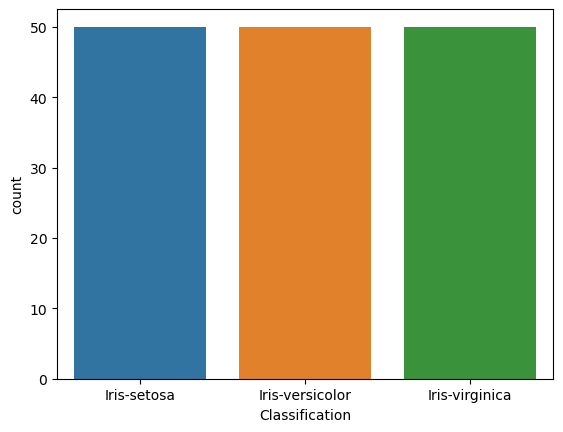

In [17]:
sns.countplot(x='Classification', data=data, )
plt.show()

<Axes: xlabel='SL', ylabel='SW'>

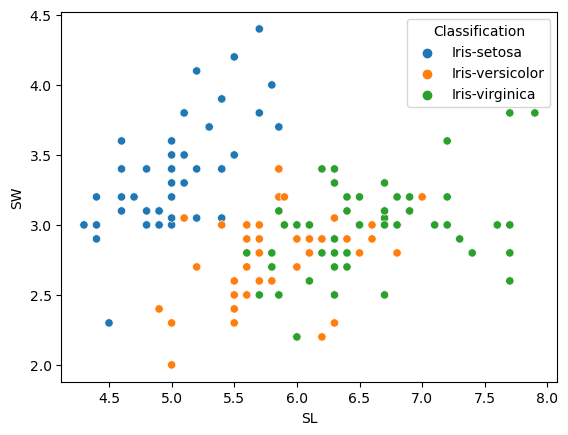

In [18]:
sns.scatterplot(x='SL', y='SW',hue='Classification', data=data, )

<Axes: xlabel='PL', ylabel='PW'>

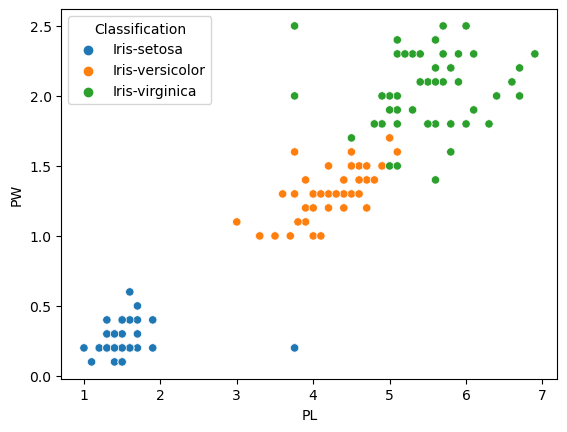

In [19]:
sns.scatterplot(x='PL', y='PW',hue='Classification', data=data, )

/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_17606/2844328334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


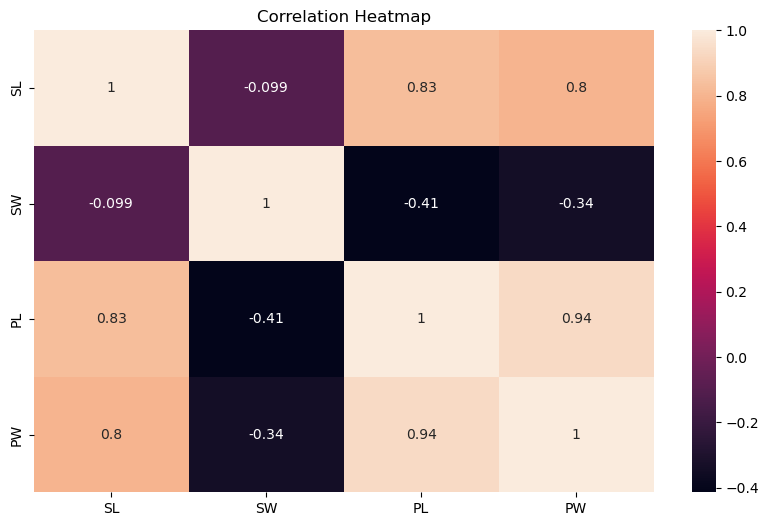

In [21]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='SL'>

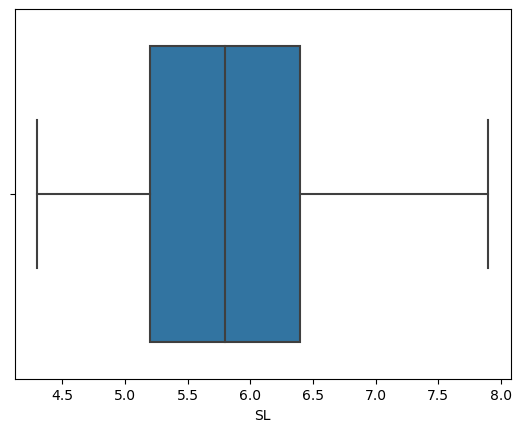

In [22]:
sns.boxplot(x='SL', data=data)

<Axes: xlabel='SW'>

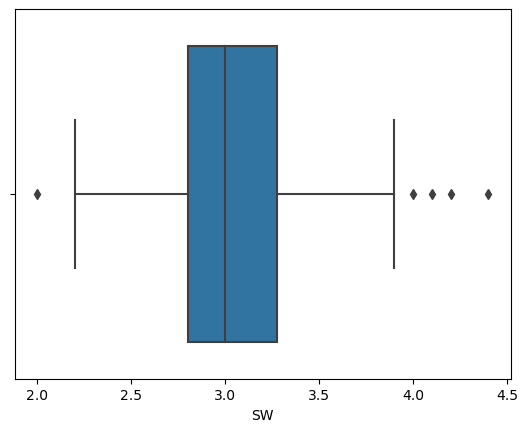

In [23]:
sns.boxplot(x='SW', data=data)

<Axes: xlabel='PL'>

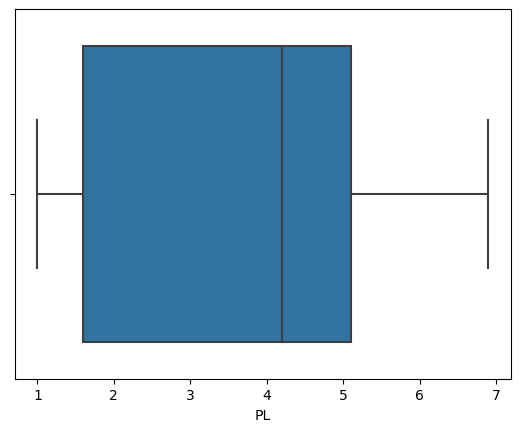

In [24]:
sns.boxplot(x='PL', data=data)

<Axes: xlabel='PW'>

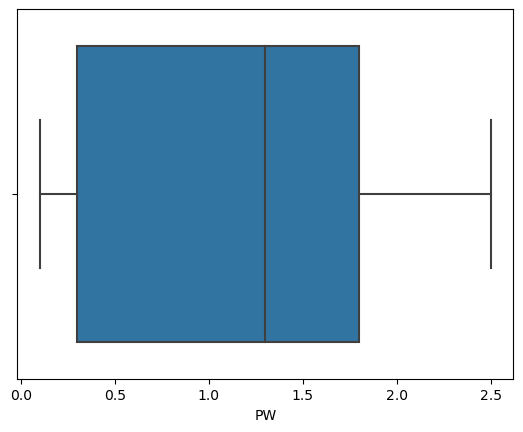

In [25]:
sns.boxplot(x='PW', data=data)

Old Shape:  (150, 5)
New Shape:  (145, 5)


<Axes: xlabel='SW'>

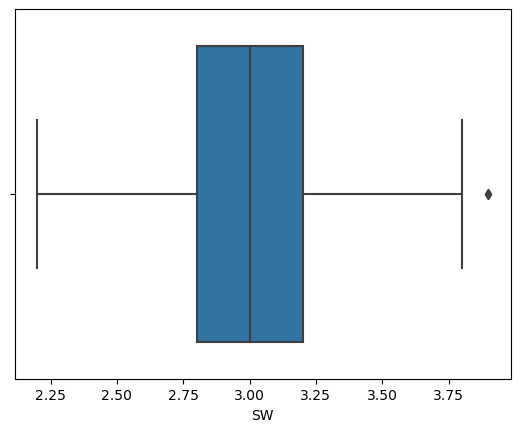

In [26]:
# Calculate the IQR
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape: ", data.shape)
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers
# Upper bound
upper = np.where(data['SW'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(data['SW'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)
 
sns.boxplot(x='SW', data=data)

Data preprocessing

In [27]:
#Creating dataframe for features
X = data.iloc[:,:-1].values

#Creating dataframe for target
y = data['Classification']

In [28]:
print(X.shape, y.shape)

(145, 4) (145,)


In [29]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116, 4) (29, 4) (116,) (29,)


In [30]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [32]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



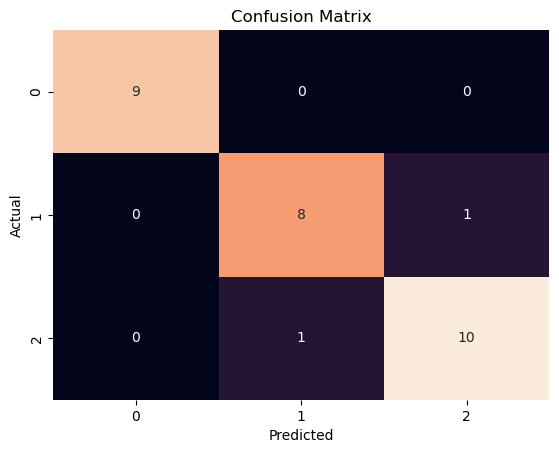

In [34]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [36]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.90
Confusion Matrix:
[[9 0 0]
 [0 8 1]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        29
      macro avg       0.90      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29



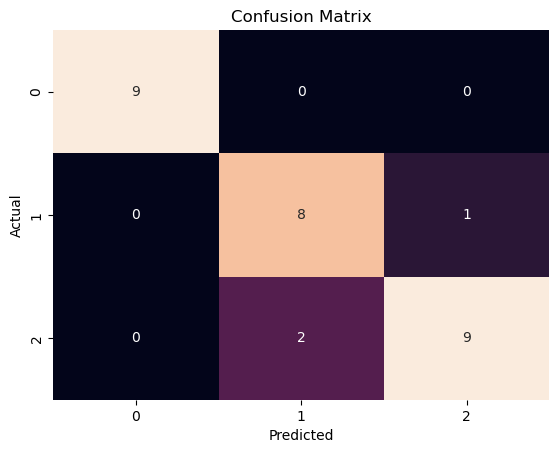

In [37]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [39]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



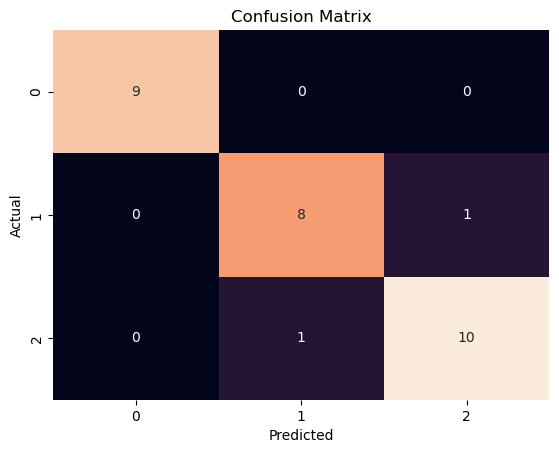

In [40]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Create Random forest Classifier
rf_classifier = RandomForestClassifier()

# train the model using the training sets
rf_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_scaled)

In [43]:
# evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



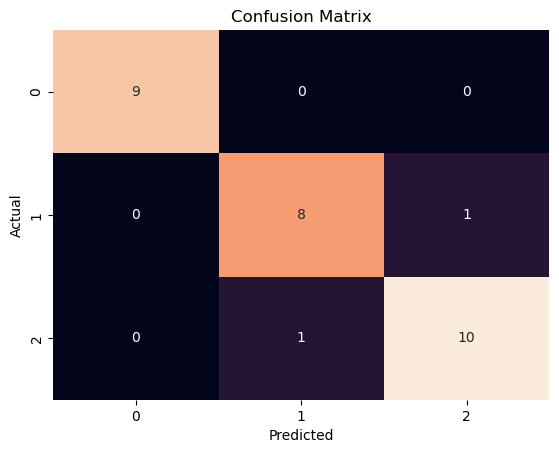

In [45]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Create Logistic regression Classifier
lr_classifier = LogisticRegression(solver='liblinear')

# train the model using the training sets
lr_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
lr_predictions = lr_classifier.predict(X_test_scaled)

In [47]:
# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)

print(f'Accuracy: {lr_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.90
Confusion Matrix:
[[9 0 0]
 [0 8 1]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        29
      macro avg       0.90      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29



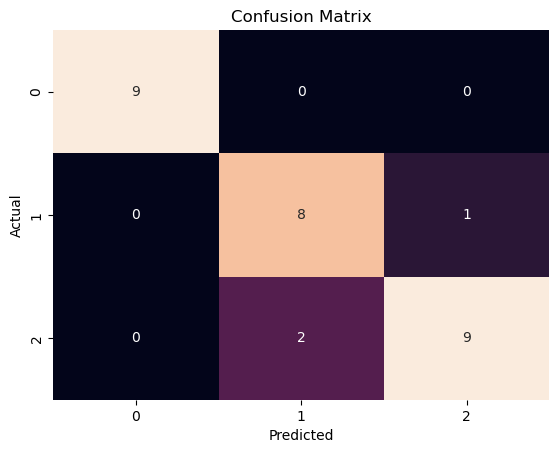

In [49]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')
print(f'Logistic regression_Accuracy: {lr_accuracy:.2f}')

SVM_Accuracy: 0.93
KNN_Accuracy: 0.90
Decision tree_Accuracy: 0.93
Random forest_Accuracy: 0.93
Logistic regression_Accuracy: 0.90


# conclusion

 The models with best performance is with SVM,Decision trees and Random forest.